In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import lightgbm as lgb

%matplotlib inline
plt.rcParams['font.family'] = 'Hiragino sans'
plt.style.use("ggplot")

In [53]:
# ch1_練習問題
## 問1.1 次の表はある年の１月の東京における平均気温、平均湿度、日照時間、風向きである。このデータについて各問に答えよ

df_1 = pd.DataFrame(
    {"平均気温":[6.6,7.0,5.9,6.3,7.3,6.5,4.0,5.9,6.1,3.4,3.8,5.1,4.4,3.8,4.0,2.2,5.0,5.5,6.3,5.4,5.0,6.0,5.7,5.1,5.9,5.3,5.5,3.7,4.2,2.9,2.9],
    "平均湿度":[33,41,48,40,39,34,25,33,46,27,31,37,28,36,52,39,26,36,41,31,28,34,42,65,34,37,28,30,40,34,28],
    "日照時間":[7.9,8.4,5.2,8.4,7.4,6.7,9.2,9.2,9.1,9.2,6.7,8.4,8.6,9.1,1.1,8.2,8.7,9.4,9.3,9.4,9.3,9.4,6.3,3.5,8.6,7.3,8.0,9.3,7.8,5.1,9.7],
    "風向き":["北西","北北西","北北西","北西","南西","北西","北西","北北西","東北西","北北西","北北西","北北西","北北西","西北西","東北西","北北西","北北西","北西","北北西","北北西","北西","北北西","南東","北西","北西","北西","北北西","北北西","北北西","北西","西北西",]},
    index = list(range(1,32))
)

df_1

,平均気温,平均湿度,日照時間,風向き
1,6.6,33,7.9,北西
2,7.0,41,8.4,北北西
3,5.9,48,5.2,北北西
4,6.3,40,8.4,北西
5,7.3,39,7.4,南西
6,6.5,34,6.7,北西
7,4.0,25,9.2,北西
8,5.9,33,9.2,北北西
9,6.1,46,9.1,東北西
10,3.4,27,9.2,北北西


In [5]:
# 1,これら４つの変数は質的変数、量的変数のどちらであるべきか述べよ
print("質的変数：平均気温、平均湿度、日照時間")
print("量的変数：風向き")

質的変数：平均気温、平均湿度、日照時間
量的変数：風向き


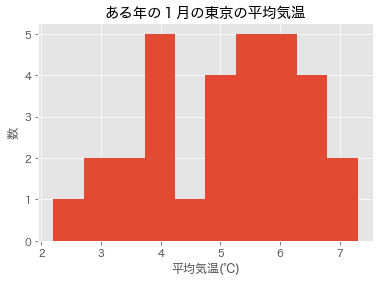

左に裾が長い、峰が２つある


In [6]:
# 2,平均気温を度数分布表にまとめ、それに基づくヒストグラムを描き、どんな形が述べよ
plt.title("ある年の１月の東京の平均気温")
plt.xlabel("平均気温(℃)")
plt.ylabel("数")  

plt.hist(df_1["平均気温"])
plt.show()


print("左に裾が長い、峰が２つある")

In [7]:
# 平均気温、湿度、日照時間の分散、標準偏差を求めよ

df_ans = pd.DataFrame(
    {"平均気温":[np.mean(df_1["平均気温"]),np.var(df_1["平均気温"]),np.std(df_1["平均気温"])],
    "平均湿度":[np.mean(df_1["平均湿度"]),np.var(df_1["平均湿度"]),np.std(df_1["平均気温"])],
    "日照時間":[np.mean(df_1["日照時間"]),np.var(df_1["日照時間"]),np.std(df_1["平均気温"])]
    },
    index=["平均","分散","標準偏差"])

df_ans

,平均気温,平均湿度,日照時間
平均,5.054839,36.225806,7.867742
分散,1.615380,69.529657,3.646701
標準偏差,1.270976,1.270976,1.270976


In [8]:
#print('np.mean(df_1["平均気温"]) = np.sum(df_1["平均気温"]) / len(df_1["平均気温"])')
#print('np.var(df_1["平均気温"]) = (Xi-X_bar)^2/n')

# これでも分散は求められる
ex_mean = np.mean(df_1["平均気温"])
tmp = 0
for i in df_1['平均気温']:
    a = i - ex_mean
    aa = a*a
    tmp += aa
ex_bar = tmp/len(df_1["平均気温"])
print(ex_bar)

# 標準偏差^2 = 分散
import math
std = math.sqrt(ex_bar)
print(std)

1.615379812695109
1.2709759292351328


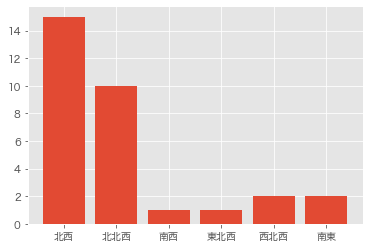

In [100]:
# 風向きの度数を棒グラフで描け

labels = list(df_1['風向き'].unique())
left = np.arange(len(labels))

plt.bar(left,list(df_1.groupby('風向き').日照時間.count()))

plt.xticks(left,labels)
plt.show()

/var/folders/57/b_s78qts1fqf11dkv9hjb3f80000gn/T/ipykernel_7658/3162370355.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['平均気温', '平均湿度', '日照時間'])


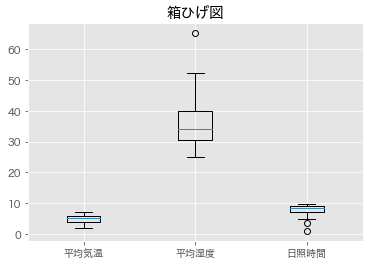

In [113]:
# 平均気温について箱ひげ図を描け
data = (df_1["平均気温"],df_1['平均湿度'],df_1['日照時間'])

fig1, ax1 = plt.subplots()
ax1.set_title('箱ひげ図')
ax1.set_xticklabels(['平均気温', '平均湿度', '日照時間'])
ax1.boxplot(data)

plt.show()

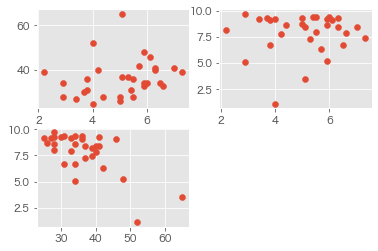

In [127]:
# 平均気温、平均湿度、日照時間について３つの散布図を描き、それぞれの相関係数を求め、考察せよ
fig = plt.figure()

ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)

ax1.scatter(df_1['平均気温'],df_1['平均湿度'])
ax2.scatter(df_1['平均気温'],df_1['日照時間'])
ax3.scatter(df_1['平均湿度'],df_1['日照時間'])

plt.show()

In [130]:
print(df_1.corr())

print('日照時間が長いと平均湿度が下がることがわかる')

          平均気温      平均湿度      日照時間
平均気温  1.000000  0.227116  0.066385
平均湿度  0.227116  1.000000 -0.672524
日照時間  0.066385 -0.672524  1.000000
日照時間が長いと平均湿度が下がることがわかる


/var/folders/57/b_s78qts1fqf11dkv9hjb3f80000gn/T/ipykernel_7658/2397389375.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


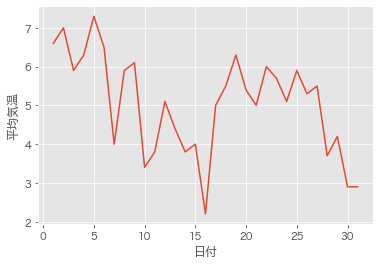

In [135]:
# 平均気温の変化を時系列データとして折れ線グラフを描け

fig,ax = plt.subplots()
ax.plot(df_1.index,df_1["平均気温"])

ax.set_xlabel('日付')
ax.set_ylabel('平均気温')

fig.show()

In [ ]:
## 問1.2 次の表は２回行った試験の結果である。このデータについて各問に答えよ